In [1]:
%matplotlib ipympl
import pyLinViscoFit as visco
from pyLinViscoFit import styles
styles.format_fig()

***
# Verification - Comparison with ANSYS APDL 2021 R1

## Master curve in time domain

In [2]:
#Load user master curve in frequency domain
data = visco.load.file('./time_master/time_user_master.csv')
RefT = -5
domain = 'time'
df_master = visco.load.user_master(data, domain, RefT)

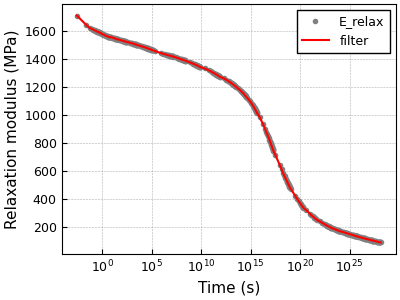

In [3]:
#Smooth
win = 1
df_master = visco.master.smooth(df_master, win)
fig_smooth = visco.master.plot_smooth(df_master)

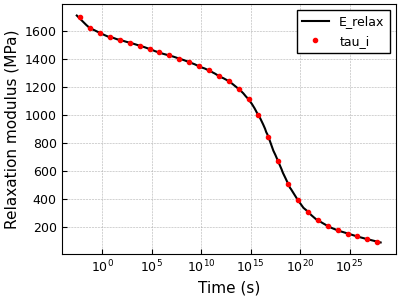

In [4]:
#Discretize number of Prony terms
df_dis = visco.prony.discretize(df_master)
fig_dis = visco.prony.plot_dis(df_master, df_dis)

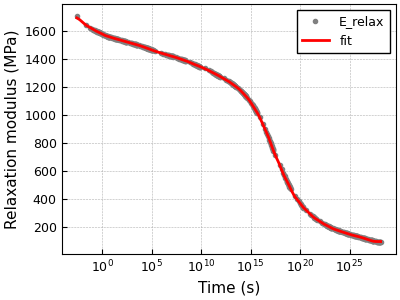

In [5]:
#Fit Prony series parameter
prony, df_GMaxw = visco.prony.fit(df_dis, df_master)
fig_fit = visco.prony.plot_fit(df_master, df_GMaxw)

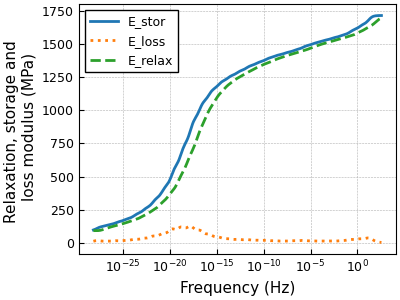

In [6]:
#Plot Generalized Maxwell model
fig_GMaxw = visco.prony.plot_GMaxw(df_GMaxw);

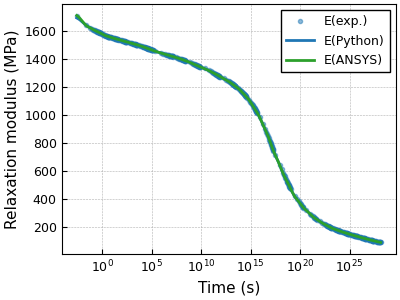

In [7]:
#Compare Python fit with ANSYS APDL
df_prony_ANSYS = visco.verify.load_prony_ANSYS('./time_master/prony_terms.MPL')
prony_ANSYS = visco.verify.prep_prony_ANSYS(df_prony_ANSYS, prony, E_0 = 1739.03)
nprony = prony_ANSYS['df_terms'].shape[0]
df_GMaxw_ANSYS = visco.prony.calc_GMaxw(**prony_ANSYS, decades = nprony)
fig_fit_ANSYS = visco.verify.plot_fit_ANSYS(df_master, df_GMaxw, df_GMaxw_ANSYS)

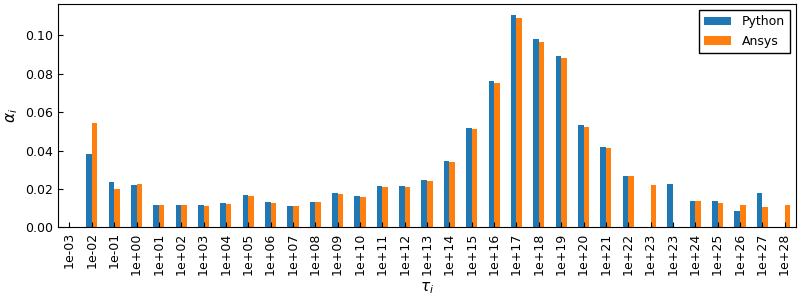

In [8]:
fig_coeff = visco.prony.plot_param([prony, prony_ANSYS], ['Python', 'Ansys'])